In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from springer_search import SpringerSearch

In [2]:
#  creating an instance of the class
spr = SpringerSearch()

# 1) Collecting statistics for several years:

In [9]:
#  creating dataframe
df = spr.collect_statistic_by_years('Computer Science', category='keyword', from_=2011, to_=2022)

[Springerlink] Created 'subject:"Computer Science" year:"2011" ' query
https://api.springernature.com/metadata/json?q=subject:"Computer Science" year:"2011"&s=1&p=0&api_key=5905d1cdb74695de77fb6287d7331fee
[Springerlink] Making a 'subject:"Computer Science" year:"2011"' request
200
[Springerlink] Response was saved in the 'date' attribute
[Springerlink] Info for 2011 year added to data frame
[Springerlink] Created 'subject:"Computer Science" year:"2012" ' query
https://api.springernature.com/metadata/json?q=subject:"Computer Science" year:"2012"&s=1&p=0&api_key=5905d1cdb74695de77fb6287d7331fee
[Springerlink] Making a 'subject:"Computer Science" year:"2012"' request
200
[Springerlink] Response was saved in the 'date' attribute
[Springerlink] Info for 2012 year added to data frame
[Springerlink] Created 'subject:"Computer Science" year:"2013" ' query
https://api.springernature.com/metadata/json?q=subject:"Computer Science" year:"2013"&s=1&p=0&api_key=5905d1cdb74695de77fb6287d7331fee
[Spr

In [13]:
print(df.shape)
df

(20, 13)


,keyword,count_2011,count_2012,count_2013,count_2014,count_2015,count_2016,count_2017,count_2018,count_2019,count_2020,count_2021,count_2022
0,Deep learning,0,0,0,0,0,226,422,873,1385,1681,2254,1326
1,Machine learning,0,0,0,103,280,345,475,760,1046,1317,1591,842
2,Artificial intelligence,0,0,0,0,0,0,0,0,234,363,542,330
3,Convolutional neural network,0,0,0,0,0,0,139,255,357,367,486,325
4,Classification,145,166,123,153,246,283,327,419,483,495,539,320
5,COVID-19,0,0,0,0,0,0,0,0,0,0,617,234
6,Blockchain,0,0,0,0,0,0,0,189,354,496,465,232
7,CNN,0,0,0,0,0,0,0,0,0,228,300,201
8,Attention mechanism,0,0,0,0,0,0,0,0,0,0,0,196
9,Cloud computing,0,112,140,214,337,361,338,416,411,326,343,191


### Let's vizualize collected data:

In [11]:
def plots_by_years(data, cols=4, default_index=True, include_curr_year=True):
    """
    Data vizualization for dataframe that was collected with by_='year' param
    
    Parameters:
        data: dataframe with data to be vizualizes
        cols: number of plots in a row for subplots (should be a divisor for features number)
        default_index: shows has dataframe a default index or not (True as default)
        include_curr_year: include or exclude information about current year to plots 
        (may distort the data due to the fact that the year is not over yet)
    """
    #  cols to vizualize
    first_col = 1 if default_index else 0
    last_col = None if include_curr_year else -1
    #  rows and cols for subplots
    if df.shape[0] % cols == 0:
        rows = df.shape[0] // cols
    else:
        raise ValueError(f'Number of plots in a row must be a divisor for number of categories - {df.shape[0]}')
    
    #  creates subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, 20), constrained_layout=True)
#     fig.subplots_adjust(hspace=.3, wspace=.3)
    #  last 2 nums of years
    ticks = df.columns[first_col:last_col].str[-4:]

    ax = axes.ravel()

    for i, _ in enumerate(ax):
        ax[i].plot(df.iloc[i][first_col:last_col])
        ax[i].set_xticks(np.arange(len(ticks)))
        ax[i].set_xticklabels(ticks, fontsize=10, rotation = 90)
        ax[i].set_title(df.iloc[i][0], fontsize=10)

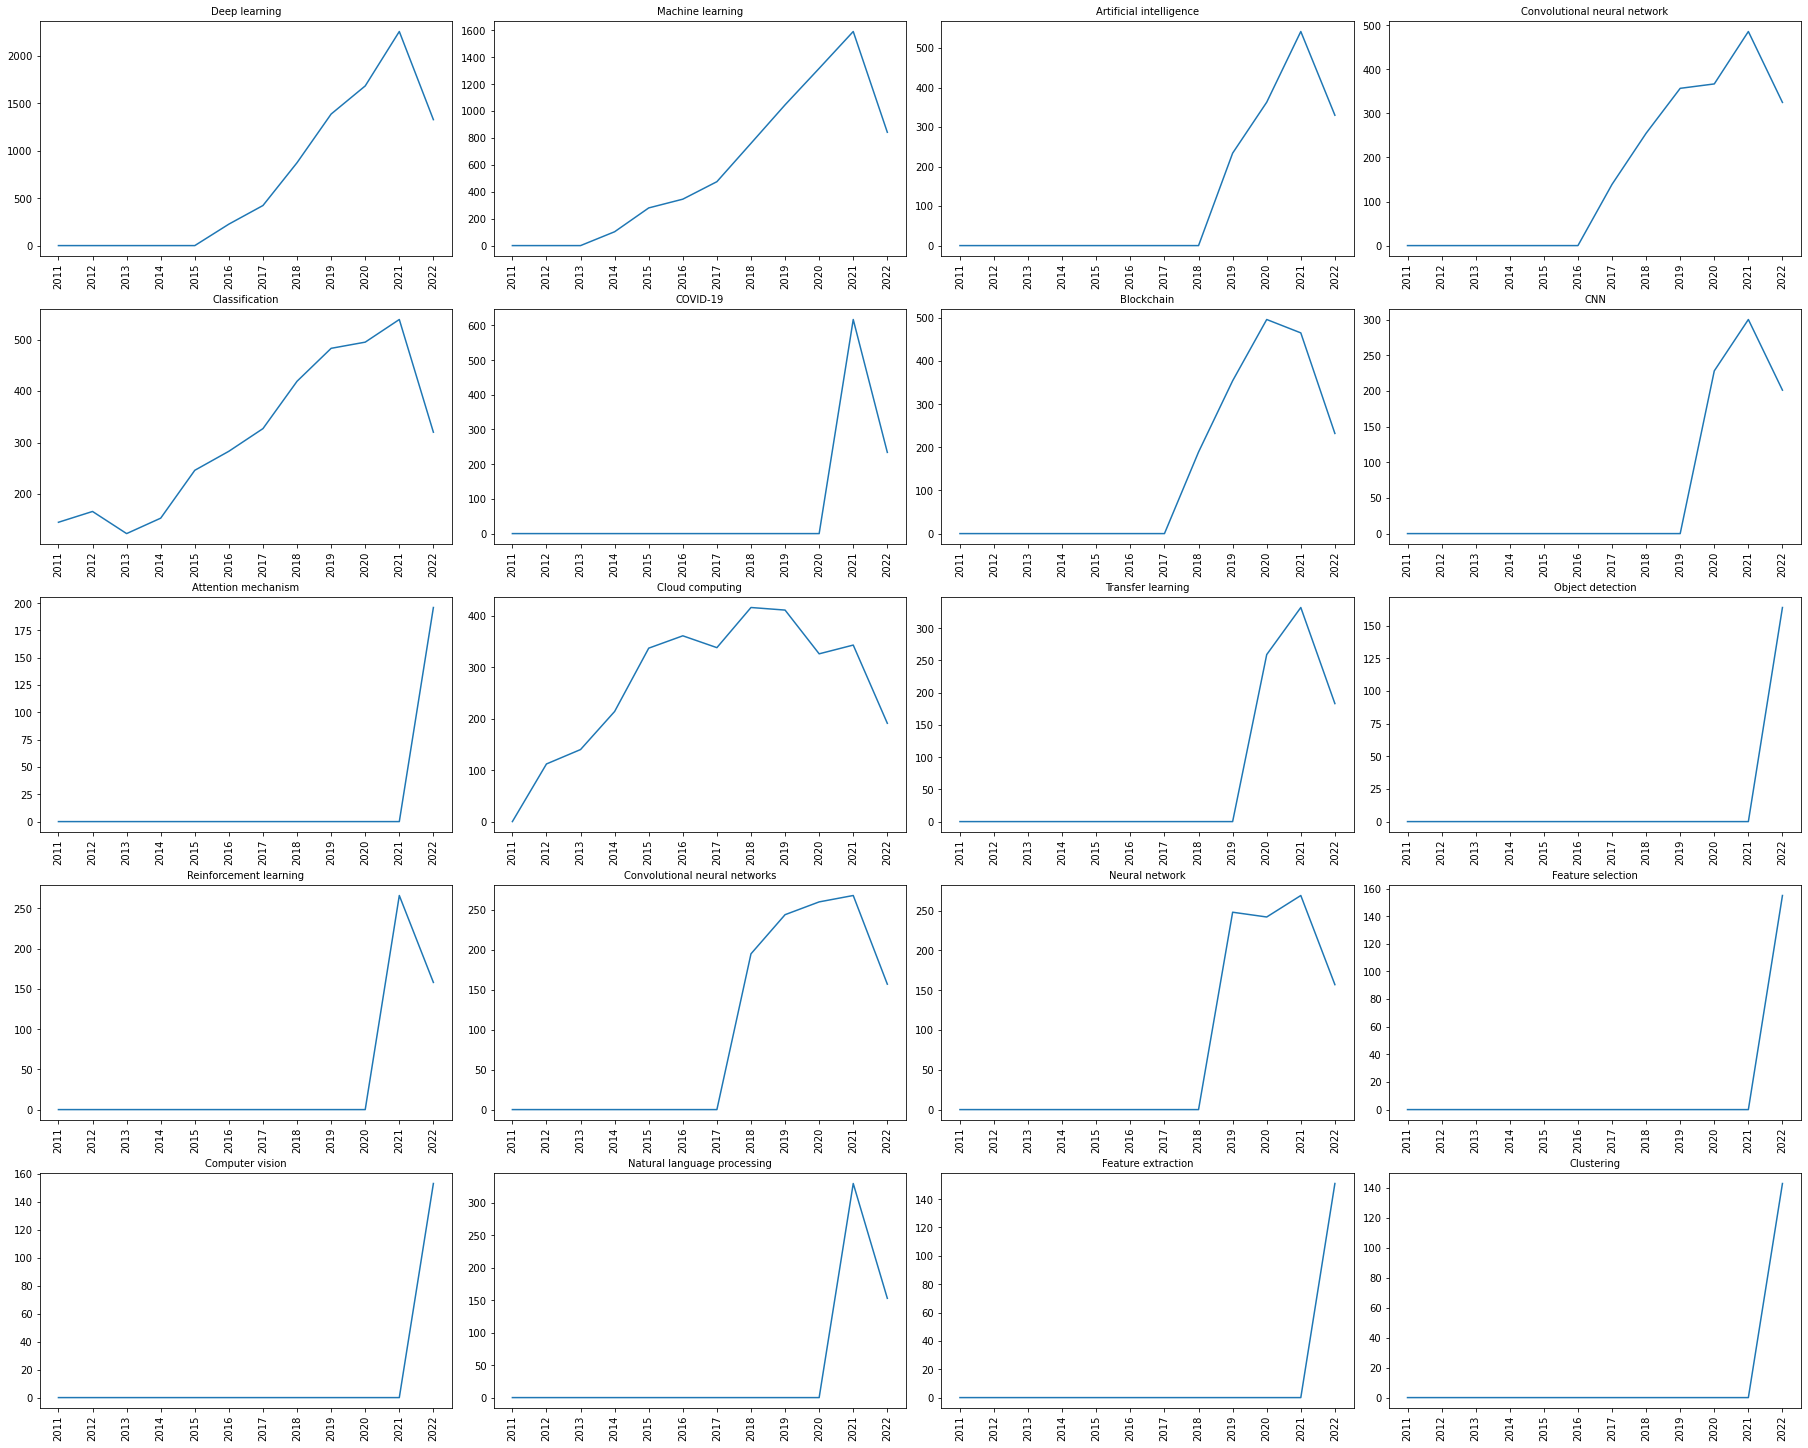

In [14]:
plots_by_years(df, 4, include_curr_year=True)

# 2) Creating dataframe by category for specified query

In [7]:
#  number of publications by all subjects(disciplines) between '2022-01-01' and '2022-02-01' dates
df2 = spr.create_dataframe_by_category(catg='subject', onlinedatefrom='2022-01-01', onlinedateto='2022-02-01')
df2.head()

[Springerlink] Created 'onlinedatefrom:"2022-01-01" onlinedateto:"2022-02-01" ' query
[Springerlink] Making a 'onlinedatefrom:"2022-01-01" onlinedateto:"2022-02-01"' request
[Springerlink] Response was saved in the 'date' attribute


,subject,count
0,Medicine & Public Health,17046
1,Engineering,10496
2,Life Sciences,6022
3,Computer Science,5485
4,Artificial Intelligence,4951


In [8]:
#  it is possible to achieve the same result using the 'create_query' function
qr = spr.create_query(onlinedatefrom='2022-01-01', 
                          onlinedateto='2022-02-01')
df_2 = spr.create_dataframe_by_category('subject', qr)
df_2.head()

[Springerlink] Created 'onlinedatefrom:"2022-01-01" onlinedateto:"2022-02-01" ' query
[Springerlink] Making a 'onlinedatefrom:"2022-01-01" onlinedateto:"2022-02-01"' request
[Springerlink] Response was saved in the 'date' attribute


,subject,count
0,Medicine & Public Health,17046
1,Engineering,10496
2,Life Sciences,6022
3,Computer Science,5485
4,Artificial Intelligence,4951
